참고 링크: https://dacon.io/codeshare/1639?dtype=recent

위도,경도 추가: https://gsuite.google.com/marketplace/app/geocode_by_awesome_table/904124517349

In [1]:
import pandas as pd

In [34]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'selenium'

In [15]:
driver = webdriver.Chrome("../../Downloads/chromedriver")


In [18]:
def get_search_page_url(code):
    return 'https://www.metro9.co.kr/site/program/station/info?menuid=001001002&station_code={}'.format(code)

code=901
url = get_search_page_url(code)

In [20]:
def get_line9_items(line9_items):
    line9_data = []
    for line9_item in line9_items:
        #역명
        try:
            station_name = line9_item.select('div.table_type_h1.mt2 >table > tbody > tr > td:nth-child(1)')[0].text
        except:
            station_name =''
        #주소
        try:
            station_add = line9_item.select('div.table_type_h1.mt2 >table > tbody > tr > td:nth-child(5)')[0].text
        except:
            station_add =''
    
        line9_data.append([station_name,station_add])
    return line9_data

In [23]:
driver = webdriver.Chrome("../../Downloads/chromedriver")

line9_data_total=[]

#진행상황 출력
for code in tqdm(range(901,939)):
    url = get_search_page_url(code)
    driver.get(url)
    time.sleep(3) # 페이지 로딩하는데 시간이 걸림
    
    #현재 페이지 html문서 가져오가
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    
    line9_items =  soup.select('div.inner')
    line9_data_list = get_line9_items(line9_items)
    
    line9_data_total = line9_data_total + line9_data_list

In [25]:
# dataframe 으로 만들어주기
data = pd.DataFrame(line9_data_total)
data.columns = ['역명','상세주소']
data['호선'] = '9'
data

,역명,상세주소,호선
0,개화,서울특별시 강서구 개화동로8길 19,9
1,김포공항,서울특별시 강서구 하늘길 지하77,9
2,공항시장,서울특별시 강서구 방화동로 지하30,9
3,신방화,서울특별시 강서구 방화대로 지하301,9
4,마곡나루,서울특별시 강서구 마곡중앙5로 지하2,9
5,양천향교,서울특별시 강서구 양천로 지하341,9
6,가양,서울특별시 강서구 양천로 지하485,9
7,증미,서울특별시 강서구 양천로 지하560,9
8,등촌,서울특별시 강서구 공항대로 지하529,9
9,염창,서울특별시 강서구 공항대로 지하631,9


In [33]:
df=pd.read_excel('data/subwayadd.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,연번,역명,호선,구,동,상세주소,전화번호
1,1,서울,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301
...,...,...,...,...,...,...,...
274,274,남한산성입구(성남법원•검찰청),8,성남시,수정구 단대동,경기도 성남시 수정구 단대동 96 남한산성입구역,6311-8220
275,275,단대오거리,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 단대오거리역,6311-8230
276,276,신흥,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 신흥역,6311-8240
277,277,수진,8,성남시,수정구 수진동,경기도 성남시 수정구 수진동 2205-1 수진역,6311-8250


In [38]:
df.columns=list(df.iloc[0, :])

In [41]:
df=df.drop(index=0)

In [51]:
df.index = df['연번']
df=df.drop(columns='연번',axis=0)
df

,역명,호선,구,동,상세주소,전화번호
연번,,,,,,
1,서울,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331
2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321
3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311
4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301
5,종로5가,1,종로구,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,6110-1291
...,...,...,...,...,...,...
274,남한산성입구(성남법원•검찰청),8,성남시,수정구 단대동,경기도 성남시 수정구 단대동 96 남한산성입구역,6311-8220
275,단대오거리,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 단대오거리역,6311-8230
276,신흥,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 신흥역,6311-8240


In [53]:
df=df.drop_duplicates('역명')

In [55]:
df=df[['역명','상세주소']]

In [57]:
data=data[['역명','상세주소']]

In [59]:
final=pd.concat([df,data])
final

,역명,상세주소
1,서울,서울특별시 중구 봉래동2가 122 서울역(1호선)
2,시청,서울특별시 중구 정동 5-5 시청역(1호선)
3,종각,서울특별시 종로구 종로1가 54 종각지하철역사
4,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선)
5,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역
...,...,...
33,송파나루,서울특별시 송파구 백제고분로 446
34,한성백제,송파구 위례성대로 51
35,올림픽공원,서울특별시 송파구 양재대로 1233
36,둔촌오륜,서울특별시 강동구 강동대로 305


In [8]:
ad=pd.read_csv('data/add_all2.csv')

### 시각화 연습

In [35]:
import folium
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rc('axes', unicode_minus=False)

import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
center = [37.541,126.986]
m=folium.Map(location=center, zoom_start=12)

In [4]:
m

In [5]:
folium.Marker(
    location=[37.5657037,126.9768616],
    popup='시청',
    icon=folium.Icon(icon='cloud')
).add_to(m)
folium.Marker(
    location=[37.4970172,127.0281681],
    popup='강남역',
    icon=folium.Icon(color='green')
).add_to(m)

In [6]:
m

In [9]:
ad

,역명,상세주소,Latitude,Longitude
0,서울,서울특별시 중구 봉래동2가 122 서울역(1호선),37.557407,126.969500
1,시청,서울특별시 중구 정동 5-5 시청역(1호선),37.565704,126.976862
2,종각,서울특별시 종로구 종로1가 54 종각지하철역사,37.570178,126.983116
3,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),37.570432,126.992190
4,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,37.570831,127.002351
...,...,...,...,...
277,송파나루,서울특별시 송파구 백제고분로 446,37.510428,127.112746
278,한성백제,송파구 위례성대로 51,37.513208,127.122946
279,올림픽공원,서울특별시 송파구 양재대로 1233,37.516449,127.131107
280,둔촌오륜,서울특별시 강동구 강동대로 305,37.520010,127.140673


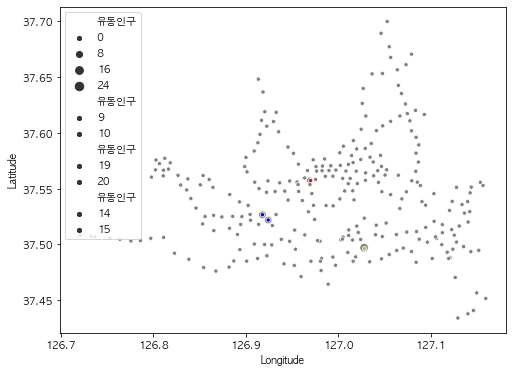

In [29]:
# 전체 역 위치 sactterplot으로 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=ad,y='Latitude',x='Longitude',color='gray',size='유동인구')
# 서울역 -> 레드
sns.scatterplot(data=ad[ad['역명'] == '서울'],y='Latitude',x='Longitude',color='r',size='유동인구')
# 강남역 -> 노랑
sns.scatterplot(data=ad[ad['역명'] == '강남'],y='Latitude',x='Longitude',color='y',size='유동인구')
# 여의도 -> 블루
sns.scatterplot(data=ad[ad['역명'] == '여의도'],y='Latitude',x='Longitude',color='b',size='유동인구')

In [23]:
ad['유동인구'] = 1

In [25]:
ad.loc[ad['역명'] == '서울','유동인구'] = 10
ad.loc[ad['역명'] == '강남','유동인구'] = 20
ad.loc[ad['역명'] == '여의도','유동인구'] = 15

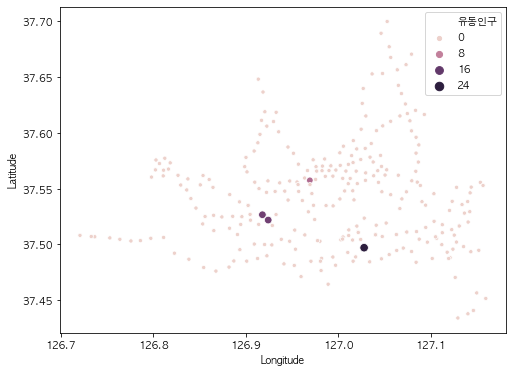

In [30]:
# 전체 역 위치 sactterplot으로 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=ad,y='Latitude',x='Longitude',hue='유동인구',size='유동인구')


In [47]:
ad['유동인구']=ad['유동인구'].astype('float64')

In [50]:
map=folium.Map(location=[37.544,127],zoom_start=13)
for n in ad.index:
    name = ad.loc[n,'역명']
    location = [ad.loc[n,'Latitude'],ad.loc[n,'Longitude']]
    radius = ad.loc[n,'유동인구']
    popup = ad.loc[n,'역명']
    folium.CircleMarker(
        location = location,
        popup = popup,
        radius = radius,
        fill = True
    ).add_to(map)
map

In [38]:
map2 = folium.Map(location=[37.544,127], tiles='stamentoner', zoom_start=13)
for n in ad.index:
    name = ad.loc[n,'역명']
    location = [ad.loc[n,'Latitude'],ad.loc[n,'Longitude']]
    address = ad.loc[n,'상세주소']
    popup = f'{name}'
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map2)
map2

### tiles
stamentoner

openstreetmap

mapquestiopenaerial

stamenwatercolor

stamenterrain

mapboxbright

cartodbdark_matter


In [39]:
map3 = folium.Map(location=[37.544,127], tiles='openstreetmap', zoom_start=13)
for n in ad.index:
    name = ad.loc[n,'역명']
    location = [ad.loc[n,'Latitude'],ad.loc[n,'Longitude']]
    address = ad.loc[n,'상세주소']
    popup = f'{name}'
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map3)
map3

In [41]:
map4 = folium.Map(location=[37.544,127], tiles='stamenwatercolor', zoom_start=13)
for n in ad.index:
    name = ad.loc[n,'역명']
    location = [ad.loc[n,'Latitude'],ad.loc[n,'Longitude']]
    address = ad.loc[n,'상세주소']
    popup = f'{name}'
    folium.Marker(
        location = location,
        popup = popup,
        
    ).add_to(map4)
map4

### choropleth maps

In [37]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m